### **DIAMOND DATASET**

In [ ]:
# All Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
df = pd.read_csv('diamonds-2.csv')

drop_col = 'Unnamed: 0'
df.drop(drop_col, axis=1, inplace=True)
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200.0
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200.0
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200.0
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200.0
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200.0


In [ ]:
df.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            1
symmetry                       1
polish                         1
eye_clean                      1
culet_size                     1
culet_condition                1
depth_percent                  1
table_percent                  1
meas_length                    1
meas_width                     1
meas_depth                     1
girdle_min                     1
girdle_max                     1
fluor_color                    1
fluor_intensity                1
fancy_color_dominant_color     1
fancy_color_secondary_color    1
fancy_color_overtone           1
fancy_color_intensity          1
total_sales_price              1
dtype: int64

In [ ]:
# there is only 1 null feature having 1 null value replace it by taking mode

mode_for_total_sales_price = df['total_sales_price'].mode().iloc[0]

df['total_sales_price'].fillna(mode_for_total_sales_price, inplace=True)

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
cut,124244,11,Round,102922
color,124244,11,E,22085
clarity,124244,11,SI1,21647
cut_quality,124244,6,Excellent,81341
lab,124243,3,GIA,114815
symmetry,124243,4,Excellent,78860
polish,124243,5,Excellent,98835
eye_clean,124243,5,unknown,81587
culet_size,124243,5,N,73468
culet_condition,124243,4,unknown,117432


In [ ]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

## visulaize

In [ ]:
one_carat_diamonds = df.loc[df['carat_weight'].between(.9, 1.2)].reindex()

In [ ]:
one_carat_wi_range = one_carat_diamonds.loc[df['total_sales_price'].between(1800, 12000)].reindex()

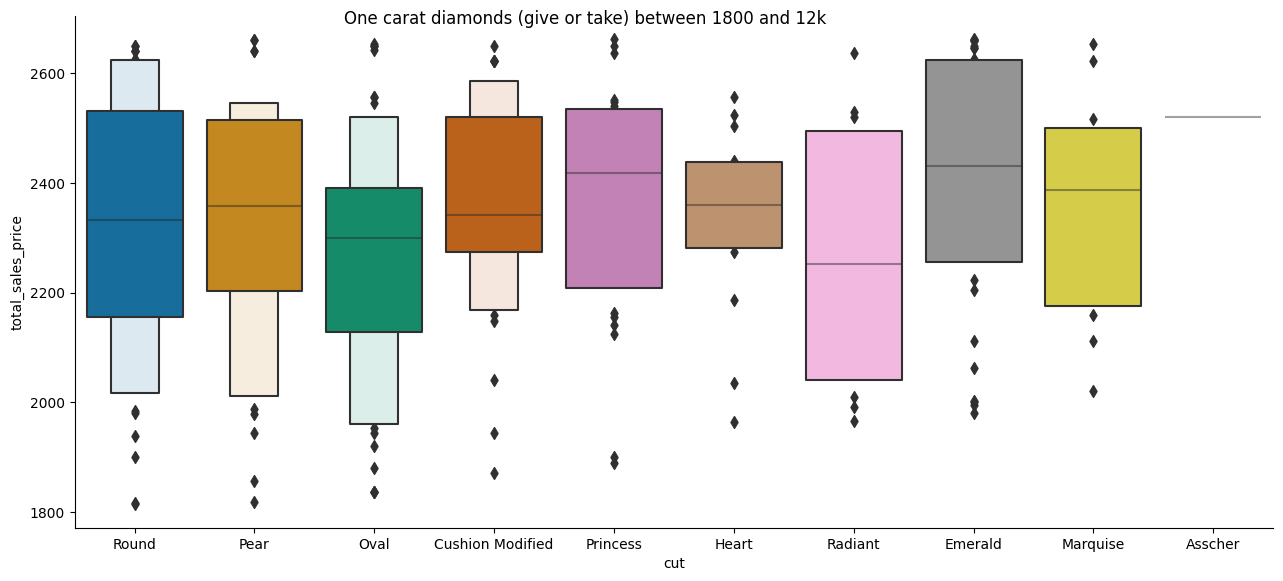

In [ ]:
f=sns.catplot(data=one_carat_wi_range, x="cut", y="total_sales_price",
              kind="boxen", color=".9",  palette="colorblind")

f.figure.set_size_inches(15, 6)
f.fig.suptitle('One carat diamonds (give or take) between 1800 and 12k');

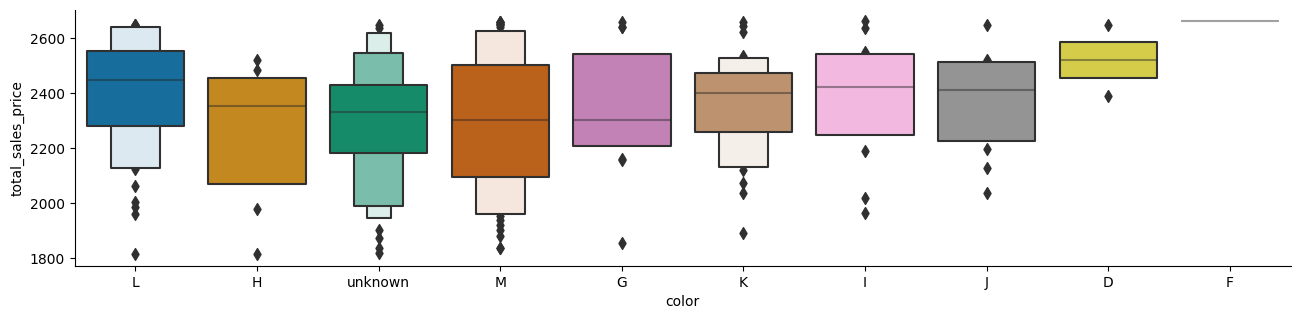

In [ ]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
f=sns.catplot(data=one_carat_wi_range, x="color", y="total_sales_price",
              kind="boxen",  palette="colorblind")

f.figure.set_size_inches(15, 3)

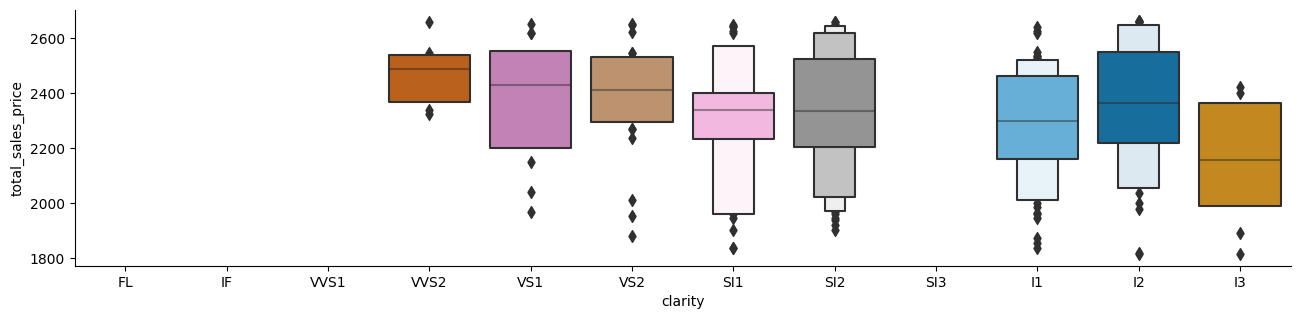

In [ ]:
sns.set_palette(palette='colorblind', n_colors=12)
clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
f=sns.catplot(data=one_carat_wi_range, x="clarity", y="total_sales_price",
              kind="boxen", order=clarities)

f.figure.set_size_inches(15, 3)

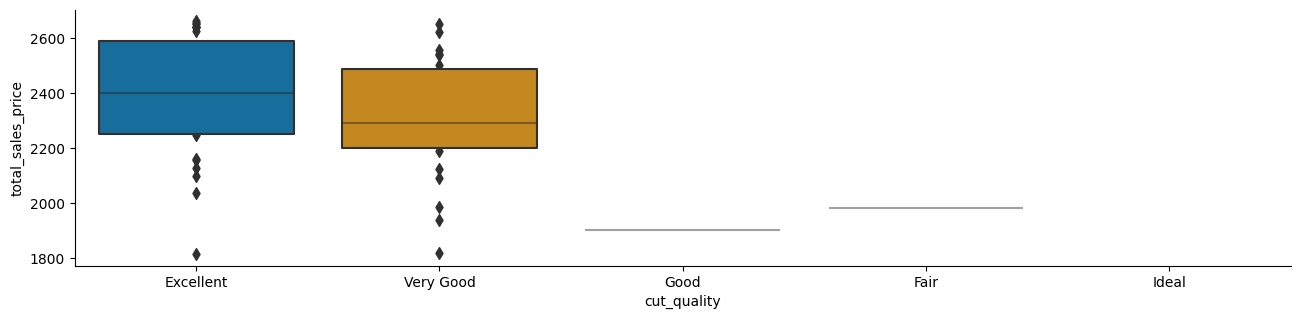

In [ ]:
cut_qualities =['Excellent', 'Very Good', 'Good', 'Fair', 'Ideal']
sns.set_palette(palette='colorblind', n_colors=5)
f=sns.catplot(data=one_carat_wi_range, x="cut_quality", y="total_sales_price",
              kind="boxen", order=cut_qualities)

f.figure.set_size_inches(15, 3)

In [ ]:
categorical_columns = ['color', 'clarity', 'cut_quality','symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max']


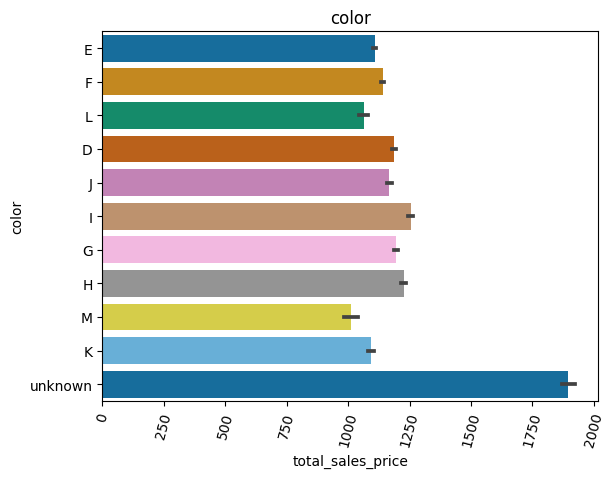

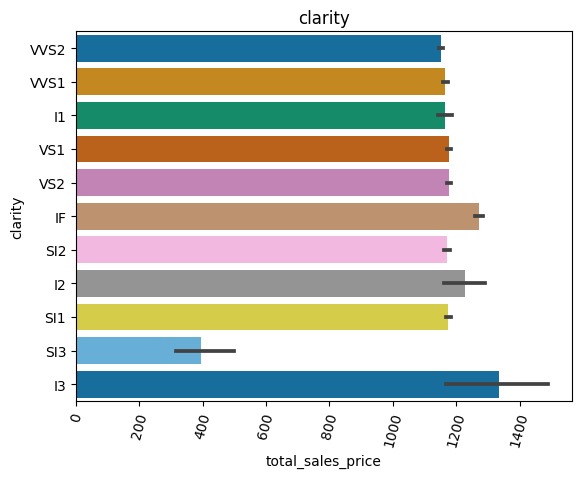

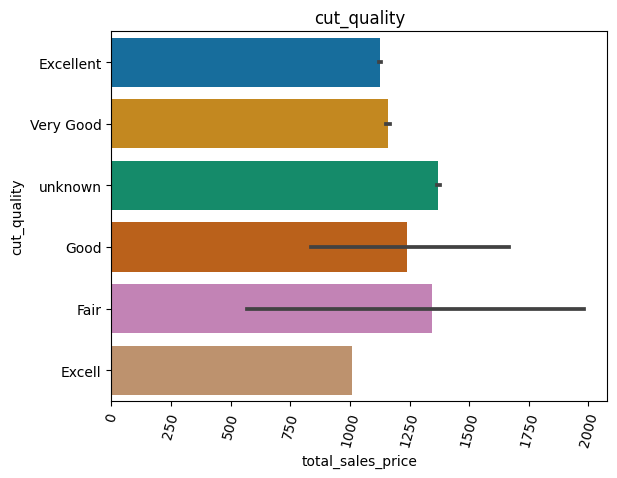

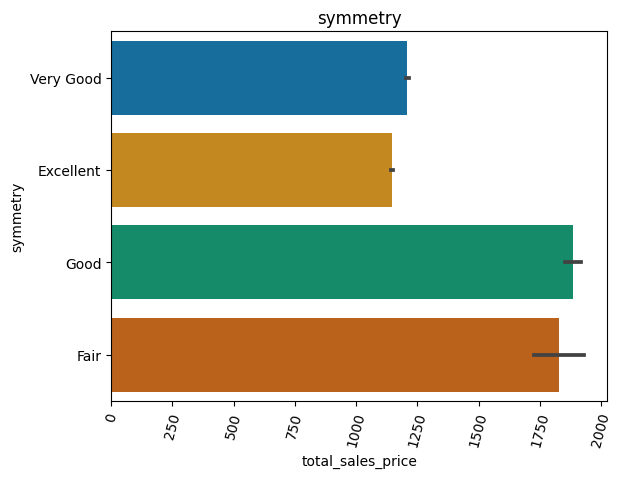

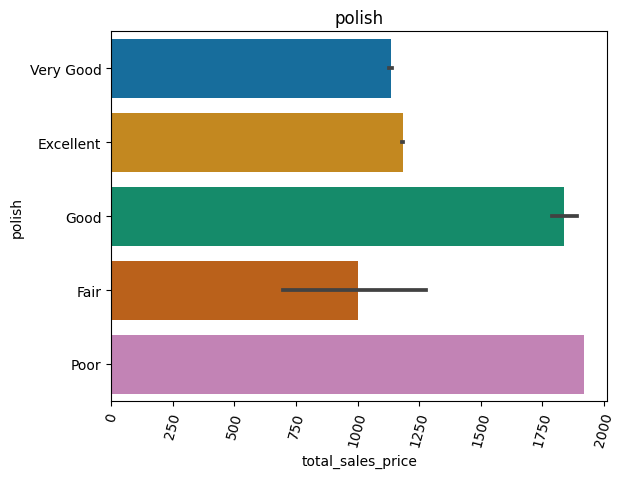

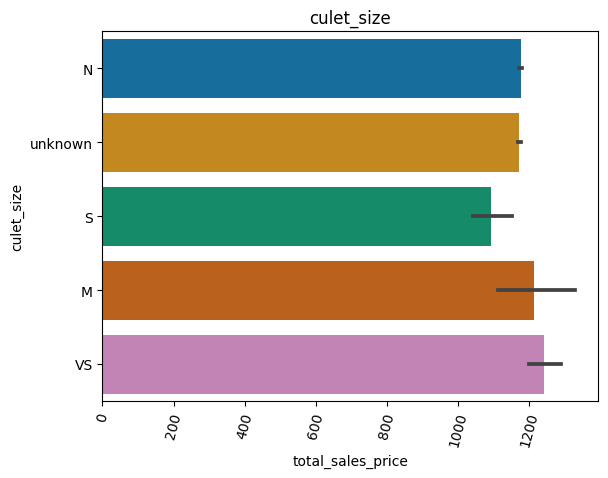

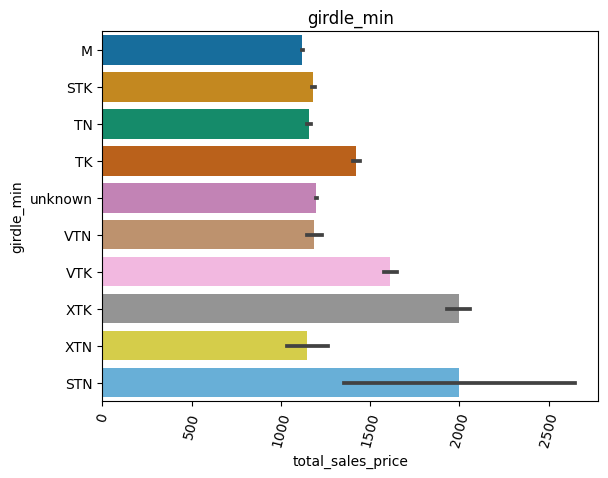

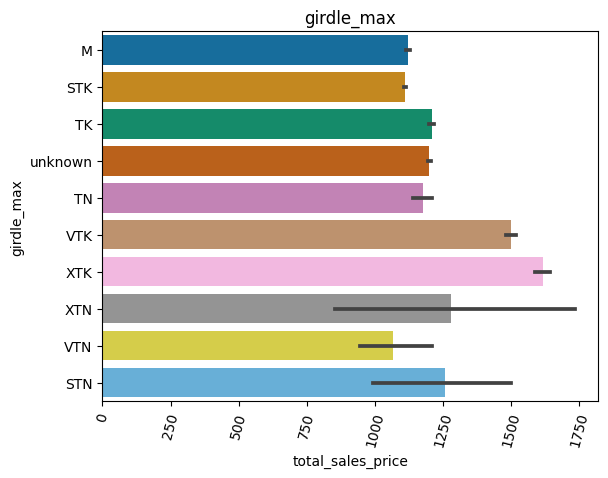

In [ ]:
for cat in categorical_columns:
    sns.barplot(df,x='total_sales_price',y=cat,palette="colorblind")
    plt.xticks(rotation=75)
    plt.title(cat)

    plt.show()

In [ ]:
numerical_features = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth']

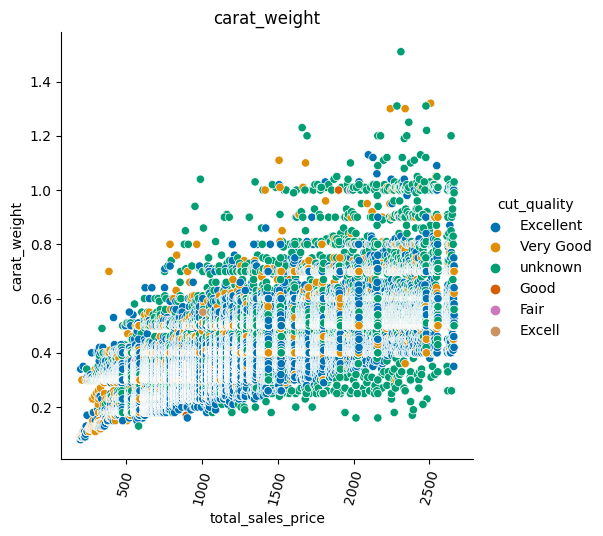

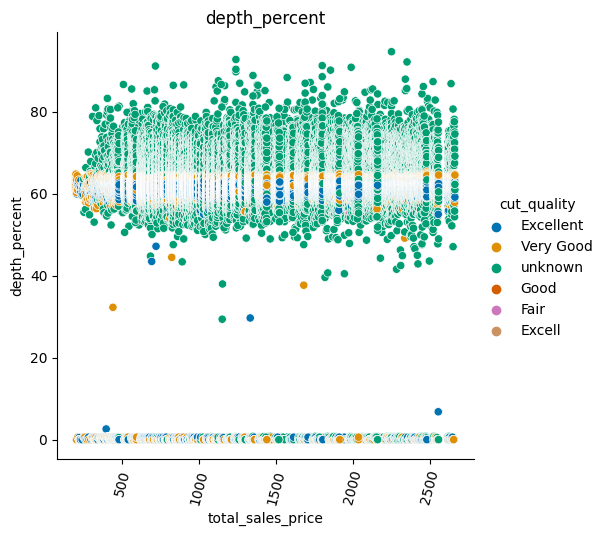

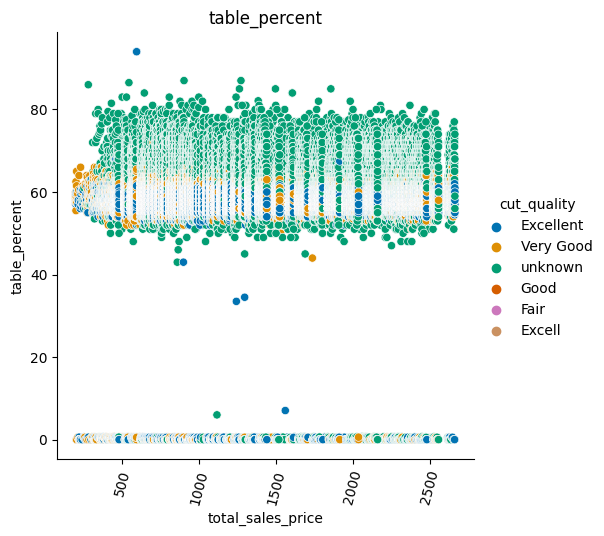

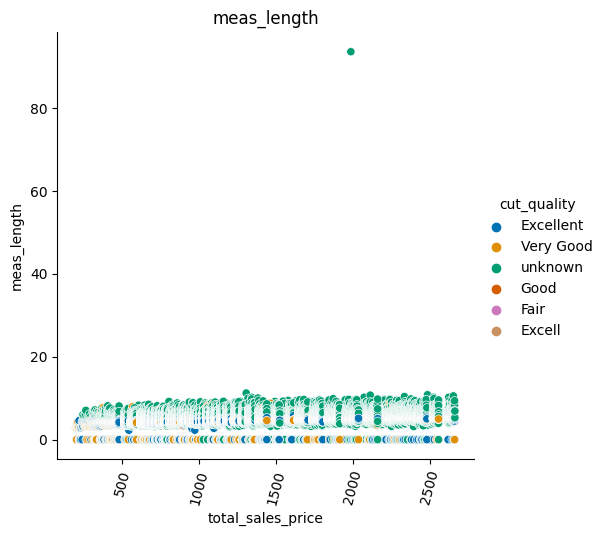

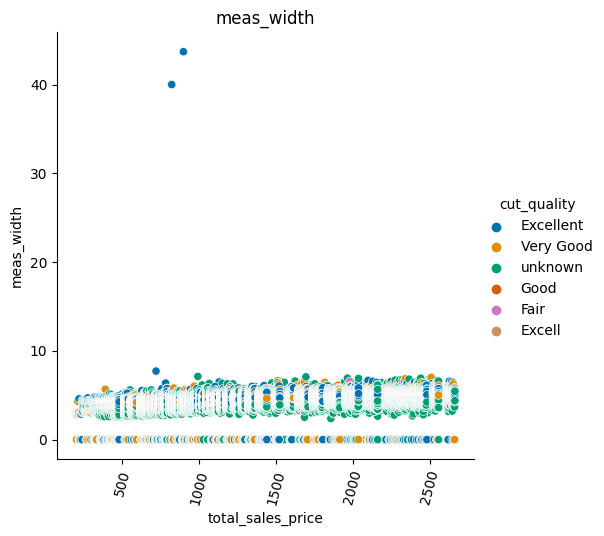

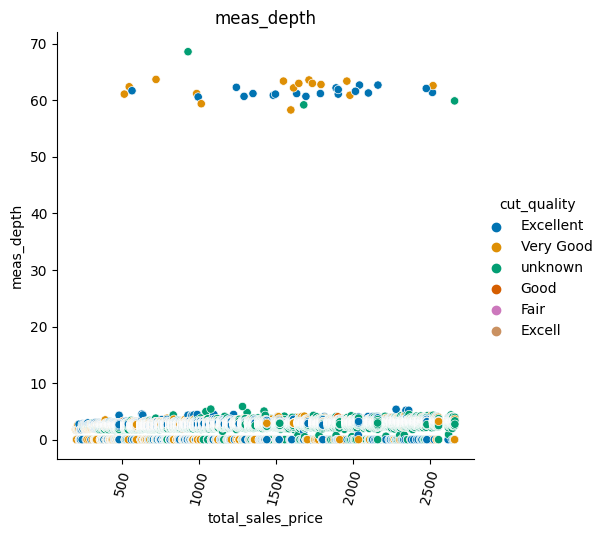

In [ ]:
for cat in numerical_features:
    sns.relplot(df,x='total_sales_price',y=cat, hue= 'cut_quality',palette="colorblind" )
    plt.xticks(rotation=75)
    plt.title(cat)

    plt.show()

In [ ]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap ='coolwarm')

<ipython-input-34-7675ed246d9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
carat_weight,1.000000,0.036200,0.020472,0.542274,0.510772,0.218514,0.777910
depth_percent,0.036200,1.000000,0.731339,0.211116,0.221075,0.106927,0.038565
table_percent,0.020472,0.731339,1.000000,0.216211,0.194713,0.087848,0.024675
meas_length,0.542274,0.211116,0.216211,1.000000,0.512499,0.194823,0.416447
meas_width,0.510772,0.221075,0.194713,0.512499,1.000000,0.334772,0.425734
meas_depth,0.218514,0.106927,0.087848,0.194823,0.334772,1.000000,0.188320
total_sales_price,0.777910,0.038565,0.024675,0.416447,0.425734,0.188320,1.000000


In [ ]:
# as instead of having null value there is unknown value in every columns

def count_for_null_values(columns):
  for col in columns:
    counts = (df[col] == 'unknown').sum()
    print(f'{col}:  {counts}')

print('No of Rows: ', df.shape[0])
print('--------------------------')
count_for_null_values(df.columns)

No of Rows:  124244
--------------------------
cut:  0
color:  1614
clarity:  0
carat_weight:  0
cut_quality:  21277
lab:  0
symmetry:  0
polish:  0
eye_clean:  81587
culet_size:  49953
culet_condition:  117432
depth_percent:  0
table_percent:  0
meas_length:  0
meas_width:  0
meas_depth:  0
girdle_min:  49351
girdle_max:  49537
fluor_color:  117827
fluor_intensity:  5
fancy_color_dominant_color:  122628
fancy_color_secondary_color:  124078
fancy_color_overtone:  123718
fancy_color_intensity:  122629
total_sales_price:  0


### **Handling the unknown values**

In [ ]:
temp_df = df.copy()

In [ ]:
# color feature
# for color columns we will take the mode value

mode_for_feature_color = temp_df['color'].mode()[0]
temp_df['color'].replace('unknown', mode_for_feature_color, inplace=True)
(temp_df['color'] == 'unknown').sum() # check for null or unknown value

0

In [ ]:
# cut_quality feature
# obtain the values either through the 4 C's of diamond or -- > #1
# through the features like Symmetry, Polish, Clarity --- > #2

import pandas as pd

diamonds = temp_df
diamonds['cut_quality'] = diamonds['cut_quality'].replace('unknown', pd.NA)

# Calculate the overall mode value of 'cut_quality' for non-null values
overall_mode_for_cut_quality = diamonds['cut_quality'].dropna().mode().iloc[0]

# Filter out rows with null 'cut_quality' values
filtered_diamonds = diamonds.dropna(subset=['cut_quality'])

# Create a dictionary to map unique combinations to 'cut_quality'
unique_combinations = filtered_diamonds[['symmetry', 'polish', 'clarity', 'cut_quality']].drop_duplicates()

# Create a dictionary to map unique combinations to 'cut_quality'
unique_combinations = diamonds[['symmetry', 'polish', 'clarity', 'cut_quality']].drop_duplicates()

# Convert NumPy arrays to tuples for use as dictionary keys
unique_combinations['key'] = list(zip(unique_combinations['symmetry'],
                                      unique_combinations['polish'],
                                      unique_combinations['clarity'],))

combination_to_cut_quality = dict(zip(unique_combinations['key'], unique_combinations['cut_quality']))

# Define a function to fill missing 'cut_quality' values
def fill_missing_cut_quality(row):
    if pd.isna(row['cut_quality']):
        key = (row['symmetry'], row['polish'], row['clarity'])
        if key in combination_to_cut_quality:
            if pd.notna(combination_to_cut_quality.get(key)):
                return combination_to_cut_quality[key]
        return overall_mode_for_cut_quality
    return row['cut_quality']

# Apply the function to fill missing 'cut_quality' values
diamonds['cut_quality'] = diamonds.apply(fill_missing_cut_quality, axis=1)
diamonds['cut_quality'] = diamonds['cut_quality'].replace(pd.NA, 'unknown')
temp_df = diamonds

In [ ]:
temp_df['cut_quality']

0         Excellent
1         Very Good
2         Excellent
3         Excellent
4         Very Good
            ...    
124239    Excellent
124240    Excellent
124241    Excellent
124242    Very Good
124243       Excell
Name: cut_quality, Length: 124244, dtype: object

In [ ]:
# culet_size
# we will take the mode for it

mode_for_feature_culet_size = temp_df['culet_size'].mode()[0]
temp_df['culet_size'].replace('unknown', mode_for_feature_culet_size, inplace=True)
(temp_df['culet_size'] == 'unknown').sum() # check for null or unknown value

0

In [ ]:
# griddle_min/max
# as this feature can only be derived from the physical attributes such as
# measurements, proportions, analysis or detailed gemological analysis
# we will choose the mode value of the feature to fill the null value or unknown value

gridle_min_without_unknown = temp_df[temp_df['girdle_min'] != 'unknown']
gridle_max_without_unknown = temp_df[temp_df['girdle_max'] != 'unknown']

mode_for_feature_girdle_min = gridle_min_without_unknown['girdle_min'].mode()[0]
mode_for_feature_girdle_max = gridle_max_without_unknown['girdle_max'].mode()[0]

temp_df['girdle_min'].replace('unknown', mode_for_feature_girdle_min, inplace=True)
temp_df['girdle_max'].replace('unknown', mode_for_feature_girdle_max, inplace=True)

print("Unknown in Girdle Min", (temp_df['girdle_min'] == 'unknown').sum()) # check for null or unknown value for girdle_min
print("Unknown in Girdle Max", (temp_df['girdle_min'] == 'unknown').sum()) # check for null or unknown value for girdle_max


Unknown in Girdle Min 0
Unknown in Girdle Max 0


In [ ]:
# Removal of the below feature is beacause of presence of null values more than half of the total entites.
# eye_clean is also remove because of the as it is almost null for half of entites and also that is indepenent from person to person.
# In below there are also the features which are dependent feature of removed feature so we must have to remove those.

temp_df = temp_df.drop(columns=['eye_clean',
                      'culet_condition',
                      'fluor_color',
                      'fluor_intensity',
                      'fancy_color_dominant_color',
                      'fancy_color_secondary_color',
                      'fancy_color_overtone',
                      'fancy_color_intensity'])
temp_df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200.0
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200.0
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,61.1,59.0,2.88,2.90,1.77,TN,M,200.0
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.0,59.0,2.86,2.88,1.78,M,STK,200.0
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124239,Pear,E,VVS1,0.50,Excellent,GIA,Very Good,Very Good,N,60.5,57.0,6.73,4.45,2.69,TK,VTK,2556.0
124240,Oval,F,VVS1,0.52,Excellent,GIA,Excellent,Excellent,N,65.3,60.0,6.01,4.46,2.91,M,STK,2556.0
124241,Emerald,E,VVS1,0.50,Excellent,GIA,Very Good,Very Good,N,68.9,66.0,5.61,3.60,2.48,M,STK,2556.0
124242,Round,H,VVS2,0.50,Very Good,GIA,Very Good,Excellent,N,64.6,58.0,4.97,5.01,3.22,TK,M,2556.0


## **Encode categorical variables using techniques like one-hot encoding or label encoding**

In [ ]:
# encoding can be done in two different ways
# for nominal attributes we use one-hot encoding
# for ordinal attributes we use label encoding


# below is the one-hot encoding
temp_df = pd.get_dummies(temp_df, columns=['cut', 'lab'], prefix=["cut", "lab"])

temp_df.head()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
0,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.7,59.0,2.85,...,0,0,0,0,0,0,1,0,0,1
1,E,VVS2,0.09,Very Good,Very Good,Very Good,N,61.9,59.0,2.84,...,0,0,0,0,0,0,1,0,0,1
2,E,VVS2,0.09,Excellent,Very Good,Very Good,N,61.1,59.0,2.88,...,0,0,0,0,0,0,1,0,0,1
3,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.0,59.0,2.86,...,0,0,0,0,0,0,1,0,0,1
4,E,VVS2,0.09,Very Good,Very Good,Excellent,N,64.9,58.5,2.79,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# below is the label encoding for the ordinal attributes
features_to_encode = ['color', 'clarity', 'cut_quality','symmetry', 'polish', 'culet_size', 'girdle_min', 'girdle_max']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through the selected features and apply label encoding
for feature in features_to_encode:
    temp_df[feature] = label_encoder.fit_transform(temp_df[feature])

temp_df.head()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
0,1,10,0.09,1,3,4,1,62.7,59.0,2.85,...,0,0,0,0,0,0,1,0,0,1
1,1,10,0.09,4,3,4,1,61.9,59.0,2.84,...,0,0,0,0,0,0,1,0,0,1
2,1,10,0.09,1,3,4,1,61.1,59.0,2.88,...,0,0,0,0,0,0,1,0,0,1
3,1,10,0.09,1,3,4,1,62.0,59.0,2.86,...,0,0,0,0,0,0,1,0,0,1
4,1,10,0.09,4,3,0,1,64.9,58.5,2.79,...,0,0,0,0,0,0,1,0,0,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['cut_quality'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['polish'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['depth_percent'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['cut_quality'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['polish'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['depth_percent'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['index', 'cut_quality'], ['cut_quality', 'polish'], ['polish', 'depth_percent'], ['depth_percent', 'table_percent']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'cut_quality', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'polish', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'depth_percent', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['index', 'table_percent', None], **{})
chart

In [ ]:
temp_df.columns

Index(['color', 'clarity', 'carat_weight', 'cut_quality', 'symmetry', 'polish',
       'culet_size', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'total_sales_price', 'cut_Asscher', 'cut_Cushion',
       'cut_Cushion Modified', 'cut_Emerald', 'cut_Heart', 'cut_Marquise',
       'cut_Oval', 'cut_Pear', 'cut_Princess', 'cut_Radiant', 'cut_Round',
       'lab_GIA', 'lab_HRD', 'lab_IGI'],
      dtype='object')

## **EDA**

In [ ]:
temp_df.describe()

,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,...,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,lab_GIA,lab_HRD,lab_IGI
count,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124243.000000,124243.000000,124243.000000,...,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000,124244.000000
mean,2.963226,6.723520,0.361750,1.610621,1.087014,0.812530,1.009707,61.207984,57.287106,4.578280,...,0.015977,0.013884,0.038964,0.032645,0.019067,0.009522,0.828386,0.924109,0.003590,0.072293
std,2.351587,2.487954,0.111825,1.195917,1.436446,1.605938,0.139514,9.430932,9.219169,0.863112,...,0.125385,0.117010,0.193509,0.177708,0.136762,0.097113,0.377046,0.264825,0.059807,0.258974
min,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,0.300000,1.000000,0.000000,0.000000,1.000000,61.100000,57.000000,4.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,7.000000,0.320000,1.000000,0.000000,0.000000,1.000000,62.300000,58.000000,4.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,5.000000,9.000000,0.410000,1.000000,3.000000,0.000000,1.000000,63.000000,59.500000,4.850000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.000000,10.000000,1.510000,4.000000,4.000000,5.000000,4.000000,94.700000,94.000000,93.660000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
